In [23]:
# Load the Data

import pandas as pd

# Load the dataset
file_path = r"C:\Users\anujg\OneDrive\文档\Dental.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())


   Sl No  Sample ID  Age  Gender  inter canine distance intraoral  \
0      1        NaN   24  Female                            25.06   
1      2        NaN   22  Female                            25.78   
2      3        NaN   23  Female                            23.83   
3      4        NaN   20  Female                            26.12   
4      5        NaN   20  Female                            26.36   

   intercanine distance casts  right canine width intraoral  \
0                       25.05                          6.08   
1                       25.79                          6.13   
2                       23.83                          5.91   
3                       26.12                          6.08   
4                       26.41                          6.09   

   right canine width casts  left canine width intraoral  \
0                      6.08                         6.09   
1                      6.13                         6.33   
2                      5.9

In [2]:
# Step 4.(i) Identify and Handle Missing Values

import pandas as pd

# Assuming df is your DataFrame
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Fill missing values with the median of the respective numeric columns
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Verify that there are no more missing values in numeric columns
print(df[numeric_cols].isnull().sum())


Sl No                                 0
Sample ID                          1100
Age                                   0
Gender                                0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts              0
left canine index intraoral           0
left canine index casts               0
dtype: int64
Sl No                                 0
Sample ID                          1100
Age                                   0
inter canine distance intraoral       0
intercanine distance casts            0
right canine width intraoral          0
right canine width casts              0
left canine width intraoral           0
left canine width casts               0
right canine index intra oral         0
right canine index casts   

In [3]:
# Step 4 (ii) Encoding Categorical Data

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Assuming 'Gender' is the categorical column we want to encode
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Verify encoding
print(df['Gender'].head())


0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int32


In [4]:
# Step 4 (iii) Split Independent and Dependent Variables (X and Y)
 
# Assuming 'Gender' is the target variable
X = df.drop('Gender', axis=1)
Y = df['Gender']

# Verify the shapes of X and Y
print(X.shape, Y.shape)


(1100, 13) (1100,)


In [6]:
# Step 4(iv) Normalize the X Variables

import pandas as pd
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.impute import SimpleImputer

# Load the dataset
file_path = r"C:\Users\anujg\OneDrive\文档\Dental.csv"
df = pd.read_csv(file_path)

# Drop identifier columns that should not be imputed
identifier_columns = ['Sample ID']  # Adjust this list based on your dataset
df = df.drop(columns=identifier_columns)

# Separate numeric and categorical columns
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Fill missing values in numeric columns with the median
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Fill missing values in categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Encode categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Separate independent and dependent variables
X = df.drop(columns=['Gender'])  # Adjust this column based on your target variable
Y = df['Gender']

# Initialize the Normalizer
normalizer = Normalizer()

# Normalize the features
X_normalized = normalizer.fit_transform(X)

# Convert back to DataFrame for ease of use
X = pd.DataFrame(X_normalized, columns=X.columns)

# Verify normalization
print(X.head())


      Sl No       Age  inter canine distance intraoral  \
0  0.022468  0.539228                         0.563044   
1  0.045023  0.495257                         0.580351   
2  0.070257  0.538636                         0.558074   
3  0.090798  0.453990                         0.592911   
4  0.112473  0.449894                         0.592960   

   intercanine distance casts  right canine width intraoral  \
0                    0.562819                      0.136604   
1                    0.580576                      0.137997   
2                    0.558074                      0.138406   
3                    0.592911                      0.138013   
4                    0.594085                      0.136993   

   right canine width casts  left canine width intraoral  \
0                  0.136604                     0.136829   
1                  0.137997                     0.142499   
2                  0.139577                     0.147071   
3                  0.138013     

#Step 5: Exploratory Data Analysis 


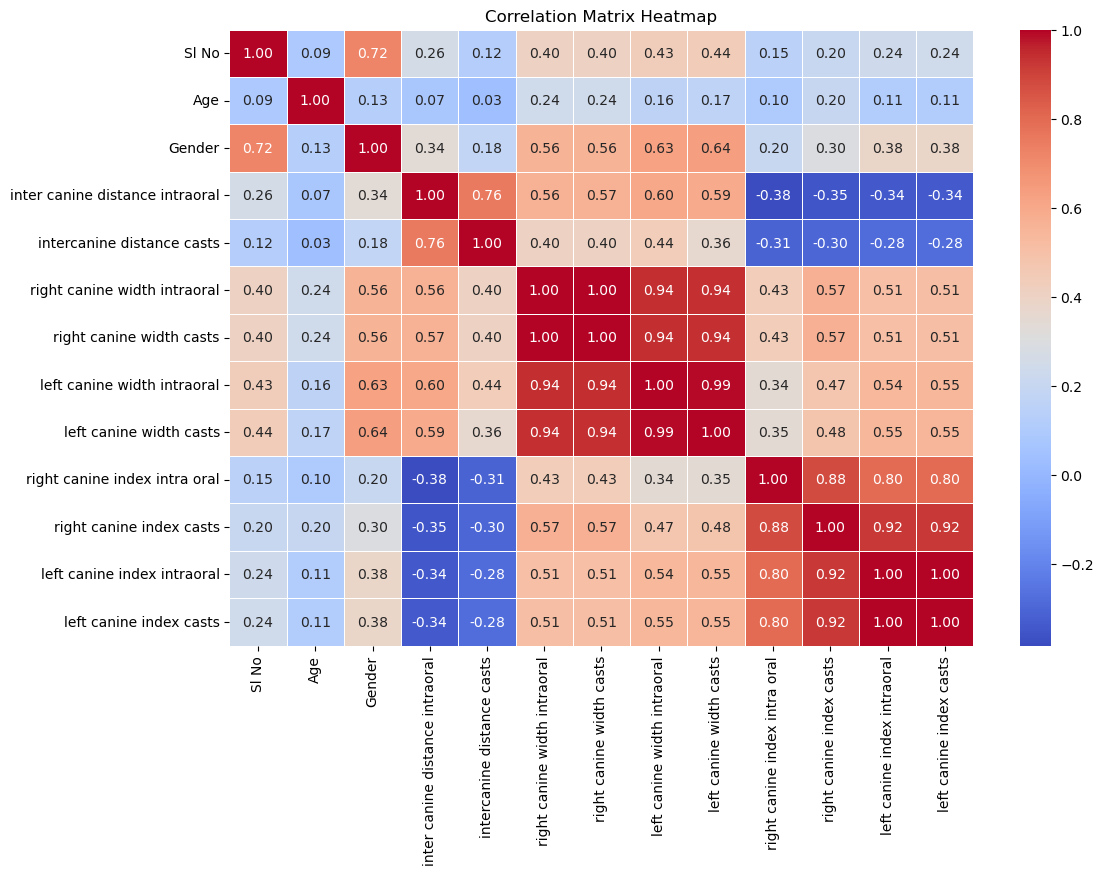

In [7]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"C:\Users\anujg\OneDrive\文档\Dental.csv"
df = pd.read_csv(file_path)

# Drop identifier columns that should not be imputed
identifier_columns = ['Sample ID']  # Adjust this list based on your dataset
df = df.drop(columns=identifier_columns)

# Separate numeric and categorical columns
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Fill missing values in numeric columns with the median
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Fill missing values in categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Encode categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Separate independent and dependent variables
X = df.drop(columns=['Gender'])  # Adjust this column based on your target variable
Y = df['Gender']

# Combine X and Y for correlation analysis
df['Gender'] = Y

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [19]:
# question 3


# Step 1: Loading and Preprocessing the Dataset

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = r"C:\Users\anujg\OneDrive\文档\Dental.csv"
df = pd.read_csv(file_path)

# Drop identifier columns that should not be imputed
identifier_columns = ['Sample ID']  # Adjust this list based on your dataset
df = df.drop(columns=identifier_columns)

# Separate numeric and categorical columns
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Fill missing values in numeric columns with the median
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Fill missing values in categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Encode categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [20]:
# Step 2: Feature Selection
import pandas as pd

# Assuming df is your DataFrame

# Separate independent and dependent variables
X = df.drop(columns=['Gender'])  # Adjust this column based on your target variable
Y = df['Gender']

# Combine X and Y for correlation analysis
df['Gender'] = Y

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Drop highly correlated features
threshold = 0.8

# Identify highly correlated features, excluding the target variable 'Gender'
highly_correlated_features = [col for col in correlation_matrix.columns if col != 'Gender' and any(correlation_matrix[col].abs() > threshold)]

# Ensure we only drop features from the independent variables
highly_correlated_features = [col for col in highly_correlated_features if col in X.columns]

X = X.drop(columns=highly_correlated_features)

print("Dropped columns due to high correlation:", highly_correlated_features)
print("Remaining columns:", X.columns)


Dropped columns due to high correlation: ['Sl No', 'Age', 'inter canine distance intraoral', 'intercanine distance casts', 'right canine width intraoral', 'right canine width casts', 'left canine width intraoral', 'left canine width casts', 'right canine index intra oral', 'right canine index casts', 'left canine index intraoral', 'left canine index casts']
Remaining columns: Index([], dtype='object')


In [18]:
# Step 3: Data Splitting
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [12]:
pip install --upgrade scikit-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5d/55/0403bf2031250ac982c8053397889fbc5a3a2b3798b913dae4f51c3af6a4/scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 495.5 kB/s eta 0:00:23
   ---------------------------------------- 0.1/11.0 MB 901.1 kB/s eta 0:00:13
    --------------------------------------- 0.2/11.0 MB 1.2 MB/s eta 0:00:09
    --------------------------------------- 0.2/11.0 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.3/11.0 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.3/11.0 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.3/11.0 MB 1.3 MB/s eta 0:00:09
   - ------------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\anujg\\anaconda3\\Lib\\site-packages\\~klearn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [13]:
# Fill missing values with the median of the respective column using pandas
X = X.fillna(X.median())


Logistic Regression Accuracy: 0.9090909090909091
Logistic Regression Confusion Matrix:
[[110   3]
 [ 17  90]]


C:\Users\anujg\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


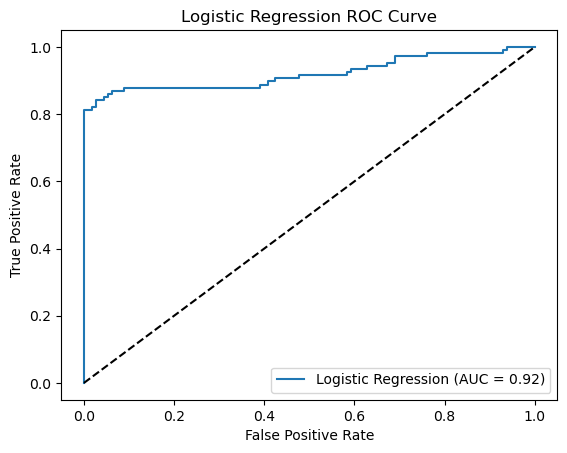

Decision Tree Accuracy: 0.9954545454545455
Decision Tree Confusion Matrix:
[[112   1]
 [  0 107]]


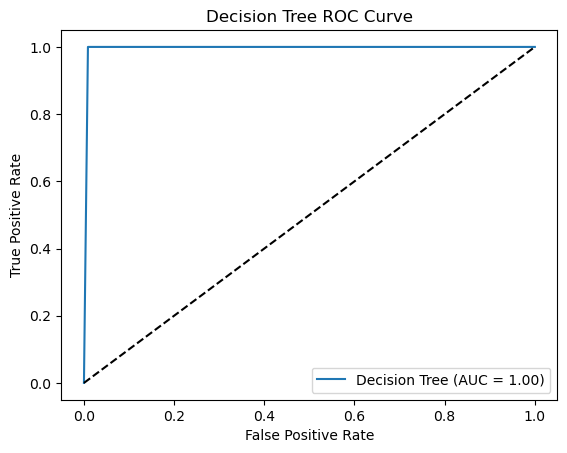

Random Forest Accuracy: 0.9772727272727273
Random Forest Confusion Matrix:
[[113   0]
 [  5 102]]


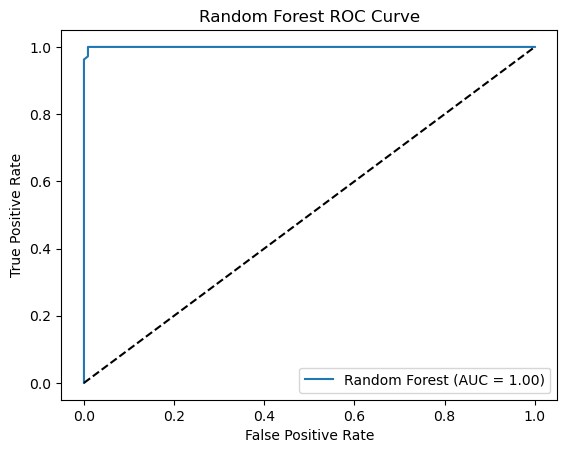

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
file_path = r"C:\Users\anujg\OneDrive\文档\Dental.csv"
df = pd.read_csv(file_path)

# Step 1: Data Preprocessing
# i) Handle missing values (if any)
X = df.drop(columns=['Gender', 'Sample ID'])  # Assuming 'Gender' is the target variable
X = X.fillna(X.median())  # Fill missing values with the median of each column

# Encode categorical target variable
le = LabelEncoder()
y = le.fit_transform(df['Gender'])

# iii) Split independent and dependent variables
# Assuming X and y are prepared

# Step 3: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training and Evaluation
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy}")

    # Example of evaluating with confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"{model_name} Confusion Matrix:")
    print(cm)

    # Example of plotting ROC curve and AUC
    if hasattr(model, "predict_proba"):  # Check if the model has predict_proba method
        y_proba = model.predict_proba(X_test)[:, 1]  # For binary classification
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc = roc_auc_score(y_test, y_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{model_name} ROC Curve')
        plt.legend(loc='lower right')
        plt.show()


In [14]:
# question 4

# Step 1: Load the Dataset
import pandas as pd

file_path = r"C:\Users\anujg\OneDrive\文档\Dental.csv"
df = pd.read_csv(file_path)


In [15]:
# Step 2: Splitting Data into Training and Testing Sets

from sklearn.model_selection import train_test_split

X = df.drop(columns=['Gender'])
y = df['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy of Logistic Regression: 0.8954545454545455
Confusion Matrix for Logistic Regression:
[[107   6]
 [ 17  90]]


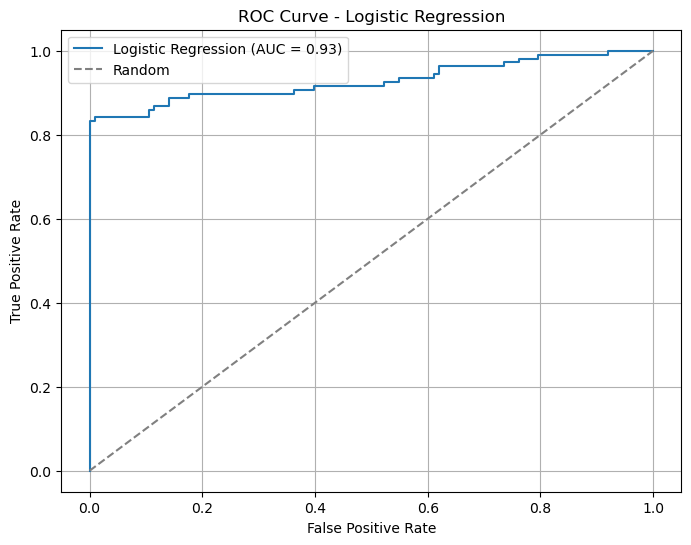

In [33]:
# Step 3: Model Training and Evaluation


from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Remove 'Sample ID' column if present
X_train = X_train.drop(columns=['Sample ID'], errors='ignore')
X_test = X_test.drop(columns=['Sample ID'], errors='ignore')

# Encode 'Female' and 'Male' labels to 0 and 1
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the model
logreg = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence

# Train the model
logreg.fit(X_train_imputed, y_train)

# Predict on test data
y_pred_logreg = logreg.predict(X_test_imputed)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy of Logistic Regression: {accuracy_logreg}")

# Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix for Logistic Regression:")
print(cm_logreg)

# ROC Curve and AUC Score
y_prob_logreg = logreg.predict_proba(X_test_imputed)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
auc_logreg = roc_auc_score(y_test, y_prob_logreg)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid()
plt.show()


Accuracy of Decision Tree Classifier: 0.9954545454545455
Confusion Matrix for Decision Tree Classifier:
[[112   1]
 [  0 107]]


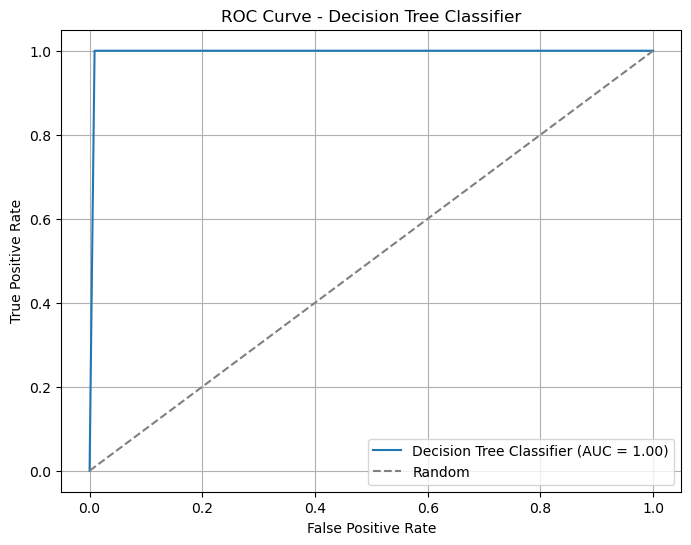

In [22]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize the model
dtree = DecisionTreeClassifier()

# Train the model
dtree.fit(X_train, y_train)

# Predict on test data
y_pred_dtree = dtree.predict(X_test)

# Evaluate the model
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f"Accuracy of Decision Tree Classifier: {accuracy_dtree}")

# Confusion Matrix
cm_dtree = confusion_matrix(y_test, y_pred_dtree)
print("Confusion Matrix for Decision Tree Classifier:")
print(cm_dtree)

# ROC Curve and AUC Score
y_prob_dtree = dtree.predict_proba(X_test)[:, 1]
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, y_prob_dtree)
auc_dtree = roc_auc_score(y_test, y_prob_dtree)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dtree, tpr_dtree, label=f'Decision Tree Classifier (AUC = {auc_dtree:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend()
plt.grid()
plt.show()


Accuracy of Random Forest Classifier: 0.9636363636363636
Confusion Matrix for Random Forest Classifier:
[[112   1]
 [  7 100]]


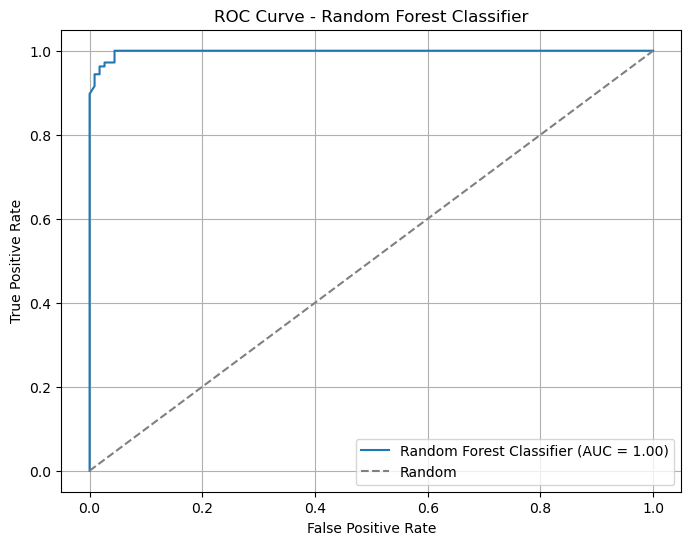

In [35]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier()

# Train the model
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy of Random Forest Classifier: {accuracy_rf}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix for Random Forest Classifier:")
print(cm_rf)

# ROC Curve and AUC Score
y_prob_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest Classifier (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend()
plt.grid()
plt.show()


Accuracy of XGBoost Classifier: 0.9818181818181818
Confusion Matrix for XGBoost Classifier:
[[111   2]
 [  2 105]]


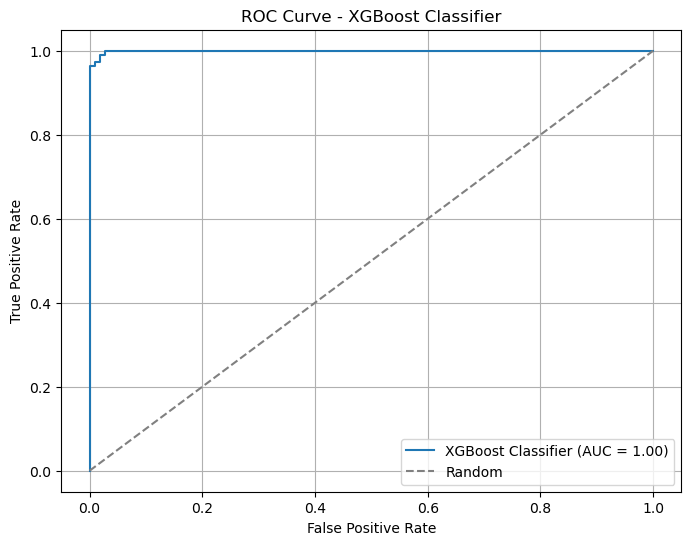

In [36]:
# XGBoost Classifier

from xgboost import XGBClassifier

# Initialize the model
xgb = XGBClassifier()

# Train the model
xgb.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Accuracy of XGBoost Classifier: {accuracy_xgb}")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix for XGBoost Classifier:")
print(cm_xgb)

# ROC Curve and AUC Score
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost Classifier (AUC = {auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost Classifier')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Step 7 : Conclusion and Documentation
# After evaluating all models using metrics like accuracy, confusion matrix, ROC curve, and AUC score, you can document your findings in a report for submission.

# Make sure to adjust the paths and details as per your project setup. This approach will help you evaluate the models effectively for your project on predicting gender using dental metrics.